In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.util import ngrams
from collections import Counter
from collections import defaultdict

In [320]:
def frequency(f):
  frequency_dict = {}

  for word in f:
    if word in frequency_dict:
      count = frequency_dict[word]
      count += 1
      frequency_dict[word] = count
    else:
      frequency_dict[word] = 1
  most_frequent = dict(sorted(frequency_dict.items(), key=lambda elem: elem[1], reverse=True))
  return most_frequent

In [321]:
def collocations(words):
  collocate_dict = defaultdict(set)
  bigrams = ngrams(words, 2)

  for bigram in bigrams:
    word1, word2 = bigram
    collocate_dict[word1].add(word2)

  sorted_words_to_print = sorted(collocate_dict.items(), key=lambda x: len(x[1]), reverse=True)[0:5000]

  for word, collocates in sorted_words_to_print:
    print(f"{word} (Collocations: {len(collocates)})")
    collocate_dict[word] = collocates

  return collocate_dict

In [322]:
def ngrams_counter(txt):
  ret = []
  for i in range(2,10):
    print(str(i) +"-grams-------------------------------------")
    ret.append(str(i) +"-grams-------------------------------------")
    n_grams = list(ngrams(txt, i))
    n_grams_counts = Counter(n_grams)
    sorted_n_grams = sorted(n_grams_counts.items(), key=lambda x: x[1], reverse=True)
    for n_gram, count in sorted_n_grams:
      if count>1:
        print(f"{n_gram}: {count} times")
        ret.append(f"{n_gram}: {count} times")

  return ret

In [323]:
def sherlock_preprocessing(file):
  characters = ['.',',','-','?','«','»',';','–',':']
  file = file.replace('\n', ' ').lower()
  for i in characters:
    file = file.replace(i,'')

  return file.split(' ')

In [324]:
with open('sherlock_holmes.txt', 'r',encoding='utf-8') as content:
  sherlock_string = content.read()

In [325]:
sherlock_words=sherlock_preprocessing(sherlock_string)
sherlock_most_frequent=frequency(sherlock_words)
total=len(sherlock_words)

In [326]:
headers = ['RANK','COUNT','ZIPF FREQUENCY']
df_sherlock = pd.DataFrame(columns=headers)
rank = 1
for word, freq in sherlock_most_frequent.items():
  df_sherlock.loc[word] = [rank, freq, rank*freq]
  rank+=1

In [327]:
df_sherlock

,RANK,COUNT,ZIPF FREQUENCY
und,1,643,643
die,2,594,1188
der,3,548,1644
ich,4,466,1864
er,5,448,2240
...,...,...,...
versagen,5610,1,5610
umschaute,5611,1,5611
kehrte,5612,1,5612
glückseligeres,5613,1,5613


In [328]:
with open('sherlock_df.txt', 'w',encoding='utf-8') as f:
  f.write(df_sherlock.to_string())

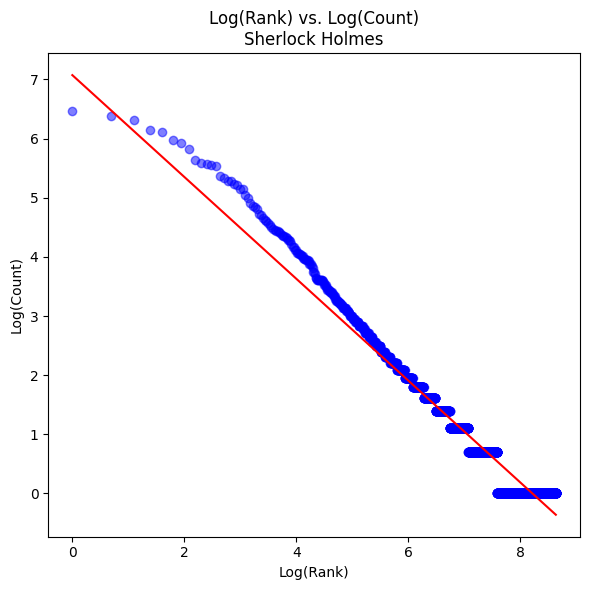

In [329]:
x = np.log(df_sherlock['RANK'])
y = np.log(df_sherlock['COUNT'])

fit = np.polyfit(x, y, deg=1)
fitted = fit[0] * x + fit[1]

fig = plt.figure(figsize=(6, 6), facecolor='w', edgecolor='w')
ax = plt.subplot(111)

ax.plot(x, y, 'bo', alpha=0.5)
ax.plot(x, fitted, 'r')

ax.set_title('Log(Rank) vs. Log(Count)\nSherlock Holmes')
ax.set_xlabel('Log(Rank)')
ax.set_ylabel('Log(Count)')

plt.tight_layout()
plt.show()

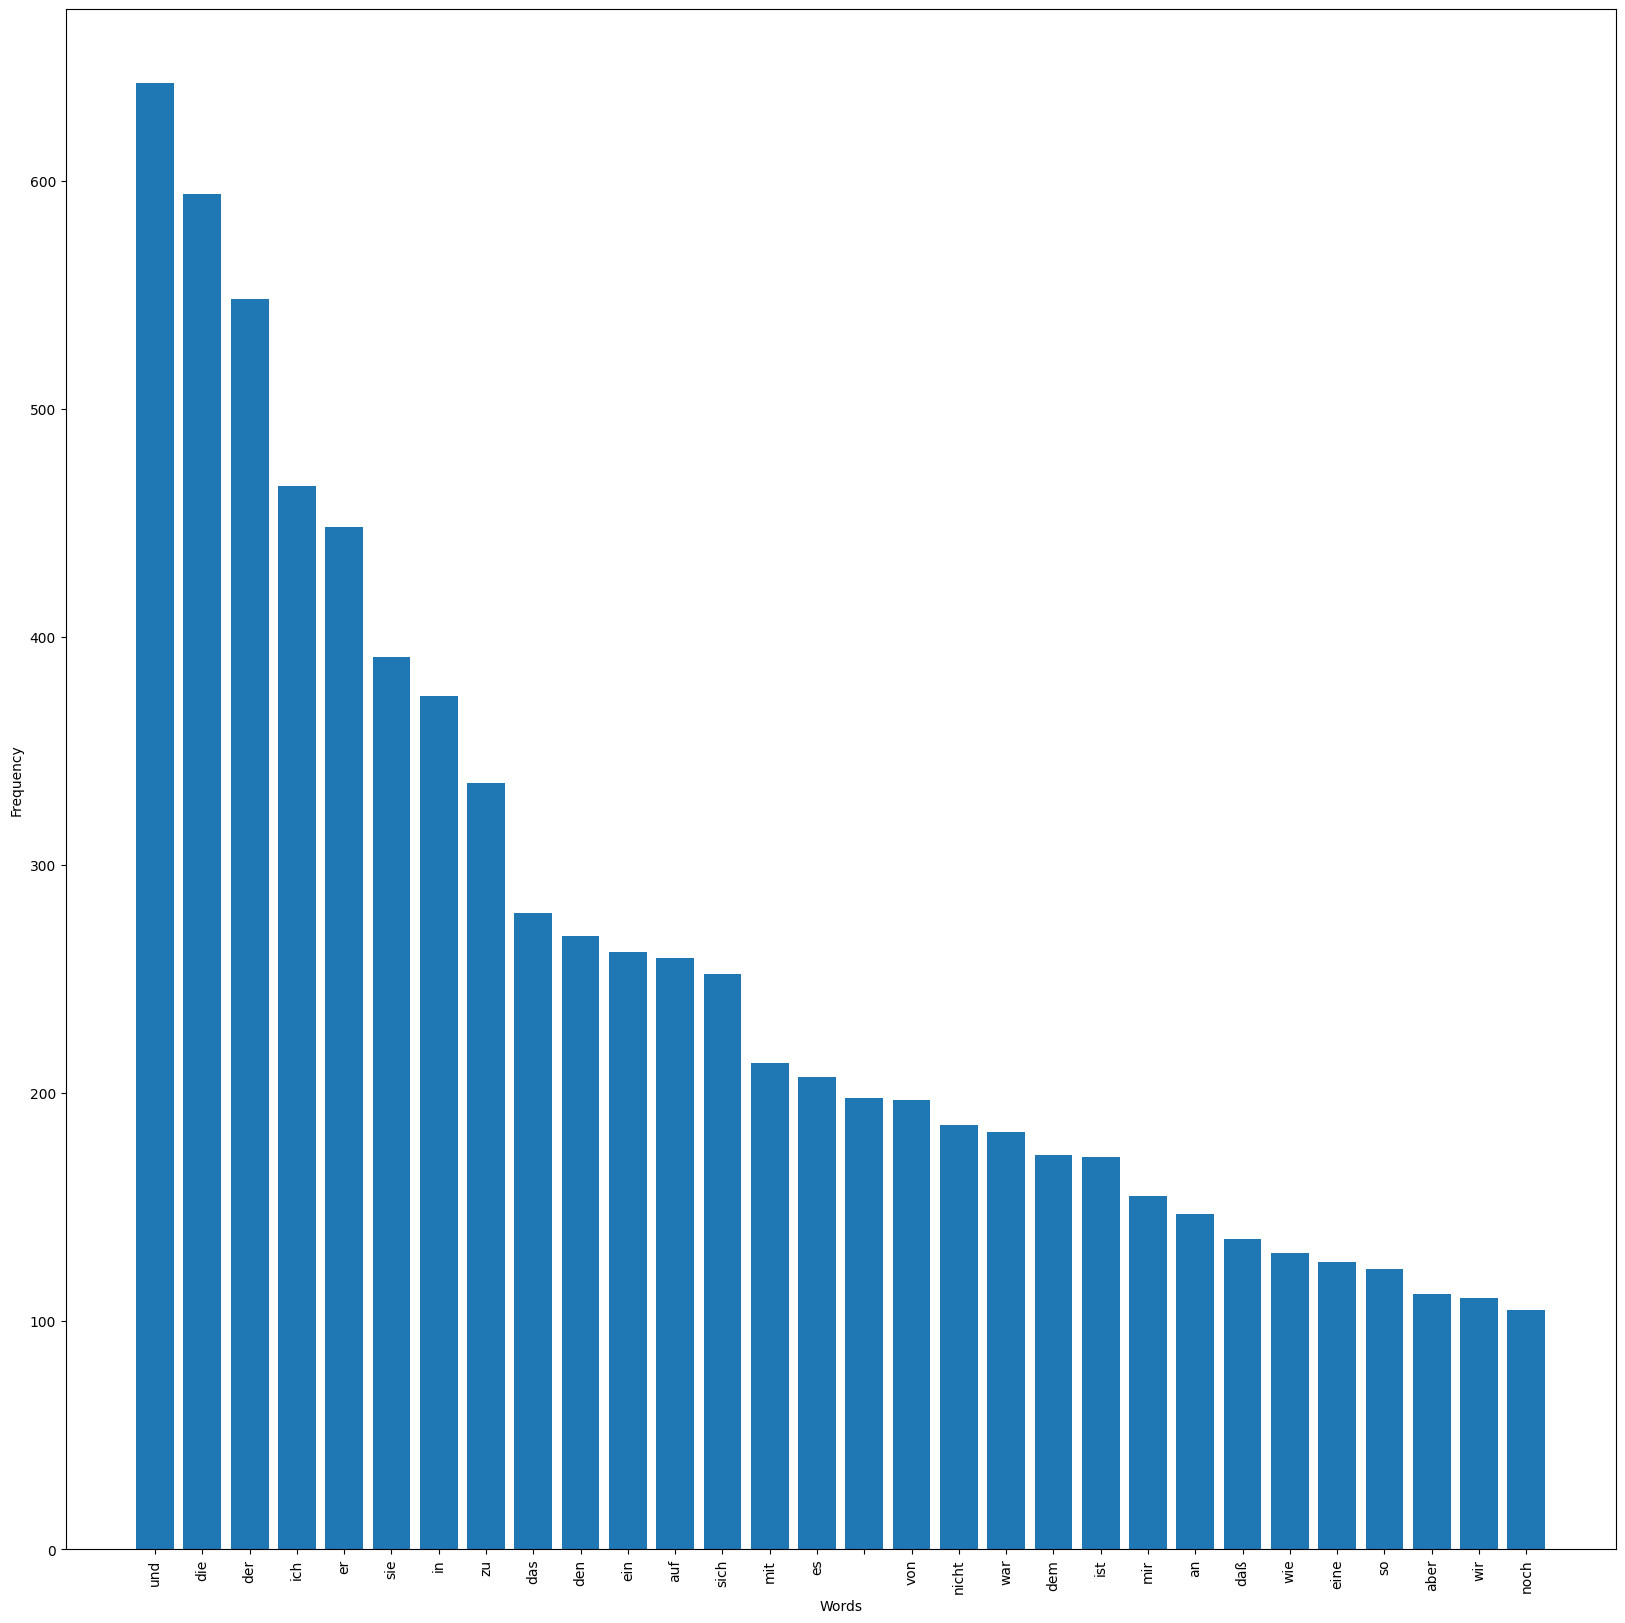

In [330]:
top_30 = dict(list(sherlock_most_frequent.items())[:30])

words = list(top_30.keys())
frequencies = list(top_30.values())

plt.figure(figsize=(20, 20))
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)

plt.bar(words, frequencies)
plt.show()

In [331]:
N = ngrams_counter(sherlock_words)

with open('sherlock_ngrams.txt', 'w', encoding='utf-8') as f:
  for i in N:
    f.write(i+"\n")

2-grams-------------------------------------
('in', 'der'): 69 times
('er', 'sich'): 44 times
('auf', 'der'): 36 times
('sagte', 'er'): 35 times
('in', 'den'): 34 times
('auf', 'dem'): 31 times
('in', 'die'): 29 times
('auf', 'den'): 28 times
('auf', 'die'): 28 times
('sherlock', 'holmes'): 26 times
('daß', 'ich'): 24 times
('daß', 'er'): 23 times
('und', 'ich'): 22 times
('sie', 'sich'): 22 times
('ich', 'habe'): 21 times
('der', 'mann'): 21 times
('nach', 'dem'): 20 times
('und', 'die'): 20 times
('von', 'dem'): 20 times
('an', 'der'): 19 times
('an', 'den'): 19 times
('mit', 'dem'): 19 times
('mit', 'der'): 19 times
('von', 'der'): 19 times
('rief', 'er'): 18 times
('auf', 'und'): 17 times
('über', 'die'): 17 times
('um', 'die'): 16 times
('es', 'ist'): 16 times
('in', 'dem'): 15 times
('mit', 'einem'): 15 times
('er', 'die'): 15 times
('sie', 'mir'): 15 times
('sie', 'mit'): 15 times
('an', 'die'): 15 times
('haben', 'sie'): 15 times
('sich', 'in'): 14 times
('in', 'das'): 14 times

In [332]:
C = collocations(sherlock_words)

with open('sherlock_collocations.txt', 'w', encoding='utf-8') as f:
  for word, collocates in C.items():
    f.write(f"{word} (Collocations: {len(collocates)})\n")

und (Collocations: 398)
die (Collocations: 380)
der (Collocations: 353)
ich (Collocations: 228)
er (Collocations: 225)
zu (Collocations: 223)
ein (Collocations: 206)
das (Collocations: 195)
den (Collocations: 194)
sie (Collocations: 193)
dem (Collocations: 142)
in (Collocations: 134)
sich (Collocations: 134)
es (Collocations: 133)
 (Collocations: 131)
von (Collocations: 121)
nicht (Collocations: 120)
mit (Collocations: 117)
eine (Collocations: 106)
so (Collocations: 106)
mir (Collocations: 101)
war (Collocations: 95)
ist (Collocations: 94)
auf (Collocations: 87)
sein (Collocations: 82)
wir (Collocations: 78)
wie (Collocations: 78)
aber (Collocations: 73)
im (Collocations: 71)
des (Collocations: 69)
noch (Collocations: 67)
holmes (Collocations: 66)
seine (Collocations: 66)
an (Collocations: 65)
einen (Collocations: 62)
ihm (Collocations: 61)
haben (Collocations: 60)
ihn (Collocations: 59)
auch (Collocations: 58)
einem (Collocations: 55)
mich (Collocations: 54)
nach (Collocations: 53)
do

In [333]:
#voynich

In [334]:
def voynich_preprocessing(txt):
  lines = txt.split("\n")
  lines = [line for line in lines if not line.startswith("#")]
  lines = [line.strip("-=") for line in lines]
  lines = [line for line in lines if line]
  words = []
  for line in lines:
    words.extend(line.split(","))
  words = [word.strip() for word in words]
  words = [word for word in words if word]
  return words

In [335]:
with open('voynich.txt', 'r',encoding='utf-8') as content:
  voynich_string = content.read()

In [336]:
voynich_words = voynich_preprocessing(voynich_string)

In [337]:
voynich_most_frequent = frequency(voynich_words)

In [338]:
df_voynich = pd.DataFrame(columns=headers)
rank = 1
for word, freq in voynich_most_frequent.items():
  df_voynich.loc[word] = [rank, freq, rank*freq]
  rank += 1

In [339]:
df_voynich

,RANK,COUNT,ZIPF FREQUENCY
8AM,1,346,346
TOE,2,155,310
TOR,3,128,384
8G,4,83,332
8AR,5,76,380
...,...,...,...
O0G,2188,1,2188
AROE,2189,1,2189
TCHAR,2190,1,2190
OFAIR,2191,1,2191


In [340]:
with open('voynich_df.txt', 'w',encoding='utf-8') as f:
  f.write(df_voynich.to_string())

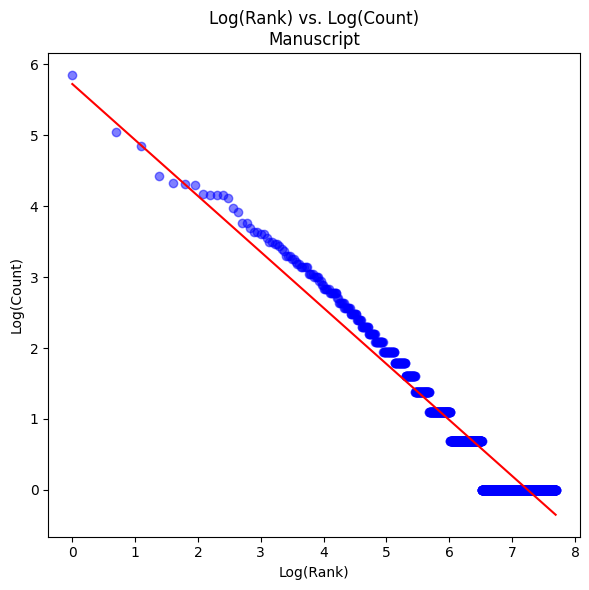

In [341]:
x = np.log(df_voynich['RANK'])
y = np.log(df_voynich['COUNT'])

fit = np.polyfit(x, y, deg=1)
fitted = fit[0] * x + fit[1]

fig = plt.figure(figsize=(6, 6), facecolor='w', edgecolor='w')
ax = plt.subplot(111)

ax.plot(x, y, 'bo', alpha=0.5)
ax.plot(x, fitted, 'r')

ax.set_title('Log(Rank) vs. Log(Count)\nManuscript')
ax.set_xlabel('Log(Rank)')
ax.set_ylabel('Log(Count)')

plt.tight_layout()
plt.show()

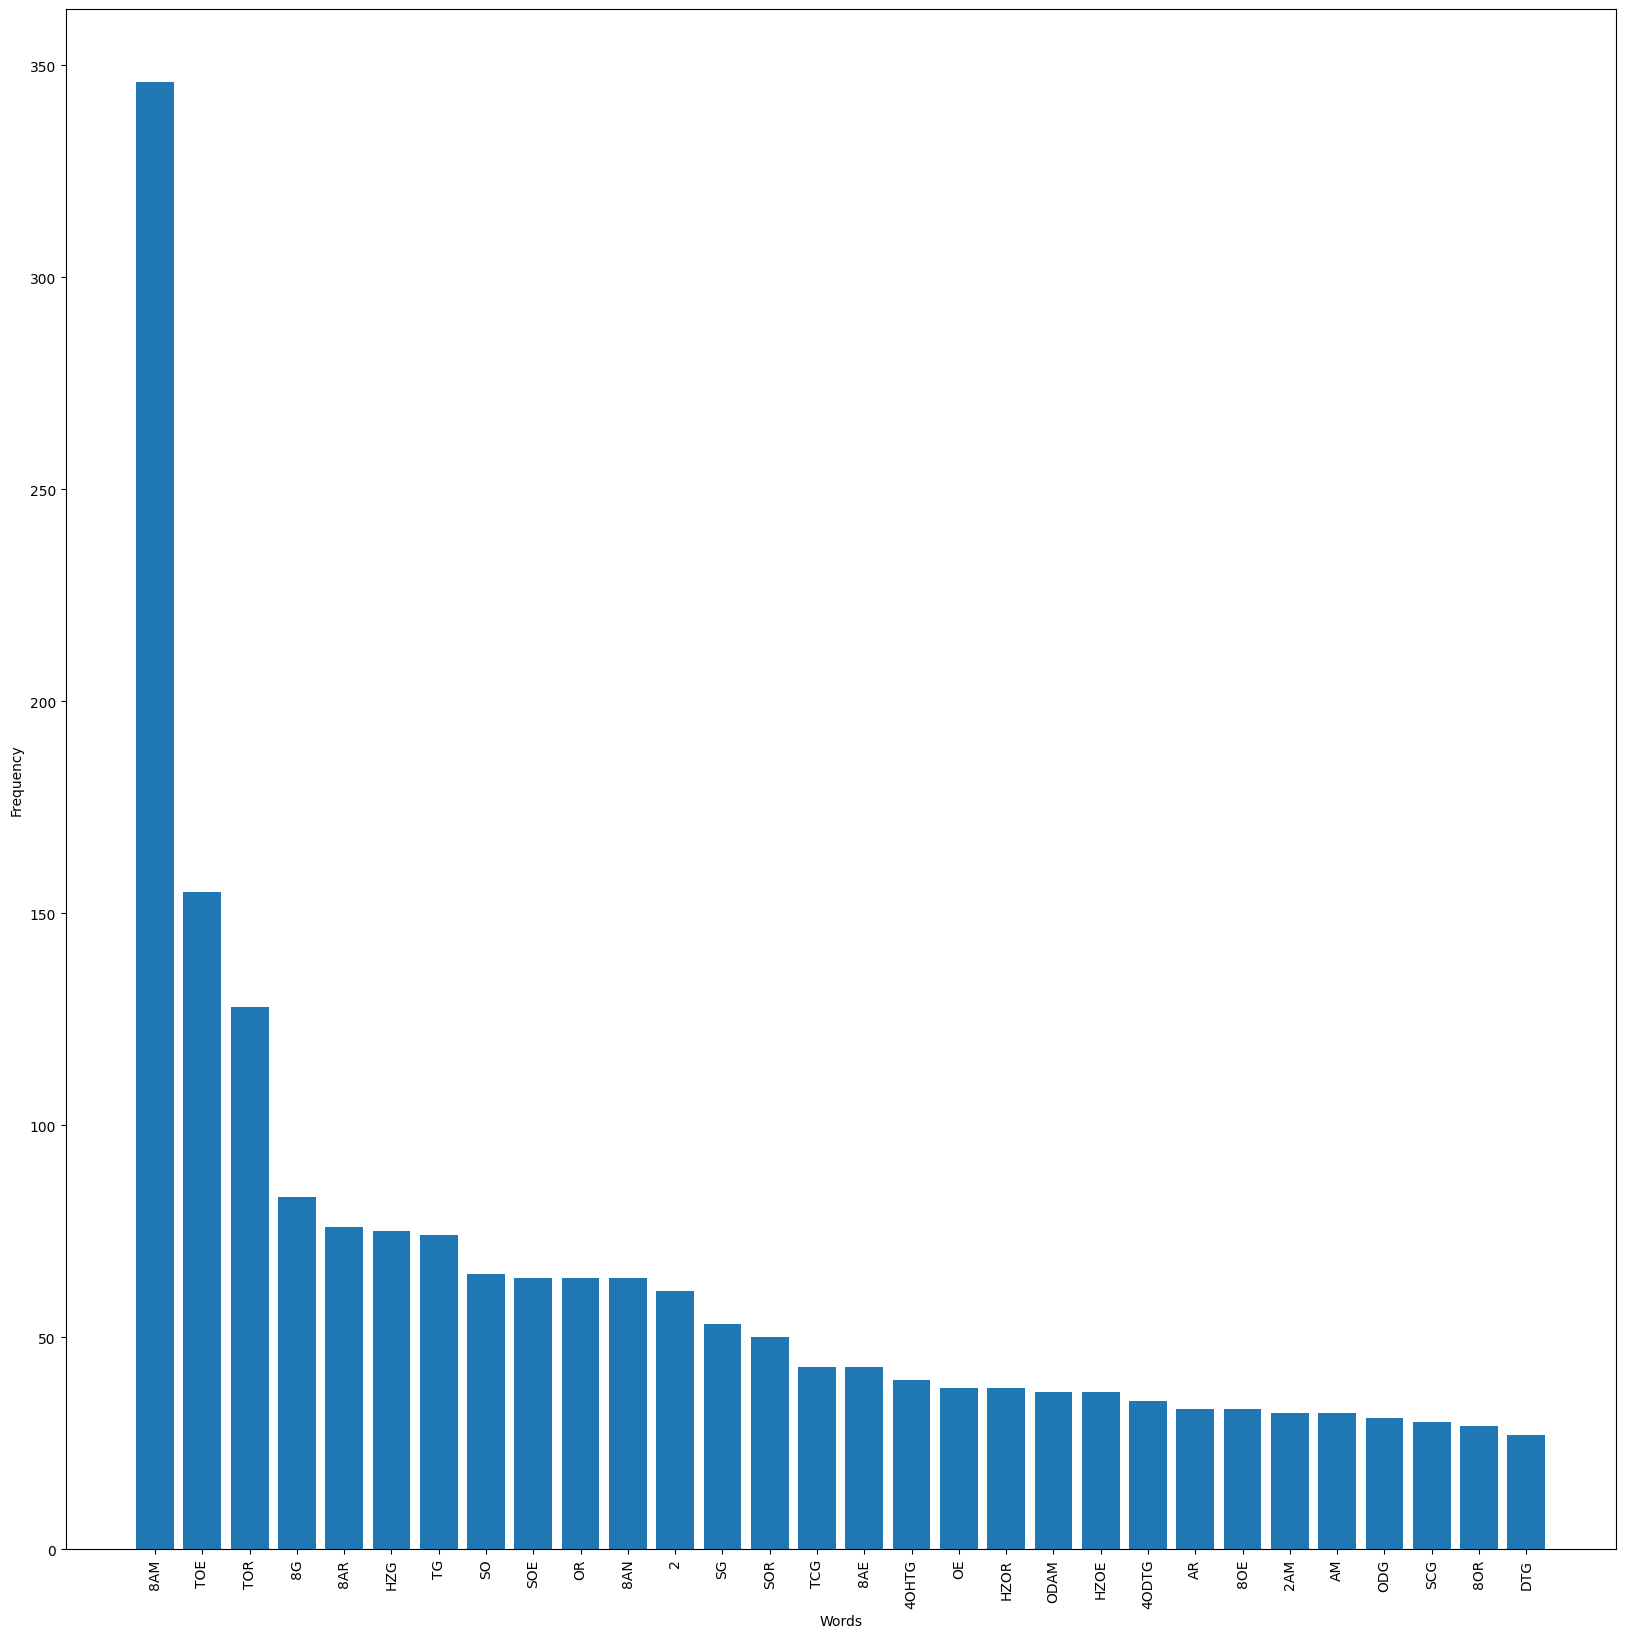

In [342]:
top_30_voynich = dict(list(voynich_most_frequent.items())[:30])

words = list(top_30_voynich.keys())
frequencies = list(top_30_voynich.values())

plt.figure(figsize=(20, 20))
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.xticks(rotation=90)

plt.bar(words, frequencies)
plt.show()

In [343]:
N = ngrams_counter(voynich_words)

with open('voynich_ngrams.txt', 'w', encoding='utf-8') as f:
  for i in N:
    f.write(i+"\n")

2-grams-------------------------------------
('TOE', '8AM'): 22 times
('8AM', '8AM'): 10 times
('TOR', '8AM'): 8 times
('TOR', 'TOE'): 8 times
('8AM', 'HZG'): 8 times
('TG', '8AM'): 8 times
('8AM', 'HZOR'): 8 times
('TOE', 'TOE'): 7 times
('SOE', '8AM'): 6 times
('HZG', '8AM'): 6 times
('8AM', 'TOR'): 6 times
('OR', 'AM'): 6 times
('8AN', '8AM'): 6 times
('TOE', 'HZOE'): 5 times
('8AM', 'SO'): 5 times
('TOR', 'TOR'): 5 times
('8AM', 'HZOE'): 5 times
('SOR', '8AM'): 5 times
('OHOE', 'TOE'): 5 times
('8AM', '4ODTG'): 5 times
('8AM', '8AN'): 5 times
('TG', 'DTG'): 5 times
('8AM', '8AK'): 5 times
('SG', '8AM'): 5 times
('8AM', '2'): 5 times
('TOE', 'TOR'): 4 times
('4ODOE', '8AM'): 4 times
('TOE', 'SOE'): 4 times
('8AM', '8AE'): 4 times
('8AM', 'TDZG'): 4 times
('HZOE', 'TOE'): 4 times
('8G', '8AM'): 4 times
('TOE', 'OR'): 4 times
('8G', '8G'): 4 times
('TOE', 'HZG'): 4 times
('8AM', '4OHTG'): 4 times
('8AM', 'TOE'): 4 times
('ODAM', 'ODAM'): 4 times
('8AM', 'ODAM'): 3 times
('8AM', 'SOR')

In [344]:
C = collocations(voynich_words)

with open('voynich_collocations.txt', 'w', encoding='utf-8') as f:
  for word, collocates in C.items():
    f.write(f"{word} (Collocations: {len(collocates)})\n")

8AM (Collocations: 233)
TOR (Collocations: 96)
TOE (Collocations: 94)
8G (Collocations: 73)
8AR (Collocations: 66)
HZG (Collocations: 62)
SO (Collocations: 58)
SOE (Collocations: 56)
8AN (Collocations: 56)
2 (Collocations: 55)
OR (Collocations: 54)
TG (Collocations: 54)
SG (Collocations: 45)
SOR (Collocations: 42)
8AE (Collocations: 42)
TCG (Collocations: 40)
4OHTG (Collocations: 36)
OE (Collocations: 33)
HZOR (Collocations: 33)
4ODTG (Collocations: 33)
8OE (Collocations: 31)
AM (Collocations: 31)
AR (Collocations: 30)
ODAM (Collocations: 30)
HZOE (Collocations: 30)
2AM (Collocations: 30)
ODG (Collocations: 29)
SCG (Collocations: 28)
DTG (Collocations: 27)
8OR (Collocations: 26)
OHAM (Collocations: 25)
T8G (Collocations: 24)
OHTG (Collocations: 24)
TC8G (Collocations: 24)
TAM (Collocations: 23)
TDZG (Collocations: 23)
TCOR (Collocations: 22)
OHG (Collocations: 22)
4ODC8G (Collocations: 22)
DZG (Collocations: 21)
8AK (Collocations: 21)
SO8G (Collocations: 20)
4OHG (Collocations: 20)
TAR